# 16 - Solving Differential Equations Numerically

## 16.1 - Numerical Solution of Differential Equations

Differential equations describe how a quantity changes with respect to another variable or variables. They are fundamental in modeling dynamic systems in science and engineering.

Differential equations can be classified into ordinary differential equations (ODEs), which involve a single independent variable, and partial differential equations (PDEs), which involve multiple variables.

### Numerical Methods

**Numerical Solutions**: While some differntial equations have analytical solutions, many real-world problems require numerical methods to find approximate solutions due to their complexity or lack of closed-form solutions.

**Numerical Techniques**: Numerical methods provide algorithms for approximating solutions to differential equations by discretizing the domain and solving the resulting system of equations numerically. These methods include Euler's method, Runge-Kutta methods, finite difference methods, finite element methods, and more.

### Steps in Numerical Solutions

1. **Discretization**: Divide the domain of the problem into discrete intervals or elements.
2. **Formulation**: Convert the differential equation into a system of algebraic equations using approximation techniques.
3. **Solution**: Solve the algebraic equations using iterative numerical techniques.
4. **Validation**: Verify the accuracy and stability of the numerical solution through convergence analysis and comparison with known solutions or experimental data.
5. **Implementation**: Implement the numerical algorithm in programming languages such as Python.

### Considerations

**Accuracy**: The accuracy of a numerical solution depends on factors such as the method used, the step size, and the convergence properties of the algorithm.

**Stability**: The stability of a numerical method determines its ability to produce meaningful results without oscillations or divergence.

**Efficiency**: Efficient numerical methods minimize computational resources such as memory and runtime while maintaining accuracy and stability.

## 16.2 - Runge-Kutta Methods

Runge-Kutta methods approximate the solution of a differential equation by stepping through the solution in small intervals, using a weighted combination of function evaluations at different points within each step. These methods provide a balance between accuracy and computational efficiency and are widely used in scientific computing and engineering simulations.

### Properties

**Accuracy**: Runge-Kutta methods can achieve higher accuracy by using more stages (evaluating the function at more points within each step) or by using higher-order approximation formulas.

**Stability**: The stability of RK methods depends on the step size, stiffness of the differential equations, and order of the method. Some RK methods may be more stable for certain types of equations or step sizes.

**Adaptability**: Many Runge-Kutta methods support adaptive step size control, allowing the step size to change dynamically based on the local behavior of the solution. This improves efficiency and accuracy.

**Convergence**: Runge-Kutta methods converge to the true solution of the differential equation as the step size approaches zero, provided certain conditions are met.

**Versatility**: Runge-Kutta methods can handle a wide range of differential equations, including stiff equations, non-linear equations, and systems of equations.

Consider the first-order ODE in the form:

$$ \frac{dy}{dt} = f(y, t), y(t_0) = y_0 $$

Now we will use the Runge-Kutta methods to solve the above equation numerically.

### Euler's Method or RK1 Method

1. Start with the initial condition: $w_0 = y_0$ at $t_0$.
2. Compute the slope $k_1 = f(t_0, w_0)$, where $h$ is the step size.
3. Update the solution: $w_1 = w_0 + k_1 h$.
4. Move to the next time step: $t_1 = t_0 + h$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk1(f, y0, t0, t_end, h):
    """Euler's method (RK1) for solving a first-order ODE."""
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < t_end:
        k1 = f(t, y)
        y += h * k1
        t += h
        t_values.append(t)
        y_values.append(y)
    
    return np.array(t_values), np.array(y_values)

Consider the equation

$$ \frac{dy}{dt} = y - t^2 + 1, \ \ \ \ y(0) = 0.5 $$

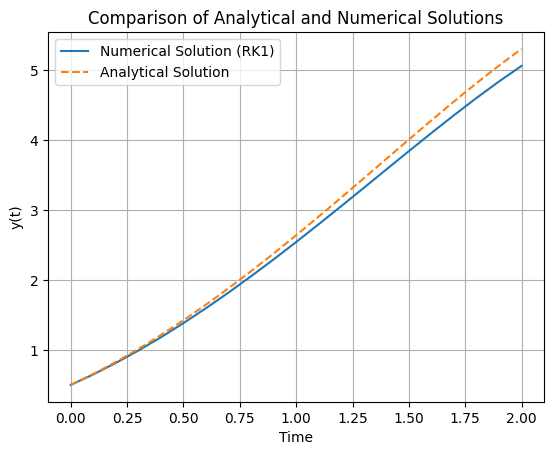

In [3]:
# Define the analytical solution
def exact_sln(t):
    return -0.5 * np.exp(t) + t**2 + 2 * t + 1

# Define the differential equation dy/dt = f(t, y)
def fx(t, y):
    return y - t**2 + 1

# Initial conditions
t0 = 0
y0 = 0.5
t_end = 2
h = 0.1

# Solve the differential equation using the RK1 method
t_values_rk1, y_values_rk1 = rk1(fx, y0, t0, t_end, h)

t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_sln(t_exact)

# Plot the solutions
plt.plot(t_values_rk1, y_values_rk1, label='Numerical Solution (RK1)')
plt.plot(t_exact, y_exact, label='Analytical Solution', linestyle='--')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Comparison of Analytical and Numerical Solutions')
plt.legend()
plt.grid(True)
plt.show()

### The Fourth-Order Runge-Kutta (RK4) Method

The RK4 method provides an effective way to approximate the solution by considering the slope at several points within the interval $[t, t+h]$. The RK4 method uses four estimates of the slope (derivatives) to calculate the state of the system at the next step. The formulae for RK4 are as follows:

$$
\begin{align*}
    k_1 &= f(t,y) \\
    k_2 &= f\left(t + \frac{h}{2}, y + \frac{h}{2} k_1\right) \\
    k_3 &= f\left(t + \frac{h}{2}, y + \frac{h}{2} k_2\right) \\
    k_4 &= f(t + h, y + hk_3) \\
    y(t + h) &= y(t) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k4)
\end{align*}
$$



In [4]:
def rk4(f, y0, t0, t_end, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < t_end:
        k1 = f(t, y)
        k2 = f(t + h/2, y + h*k1/2)
        k3 = f(t + h/2, y + h*k2/2)
        k4 = f(t + h, y + h*k3)
        y += (k1 + 2*k2 + 2*k3 + k4) * h / 6
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

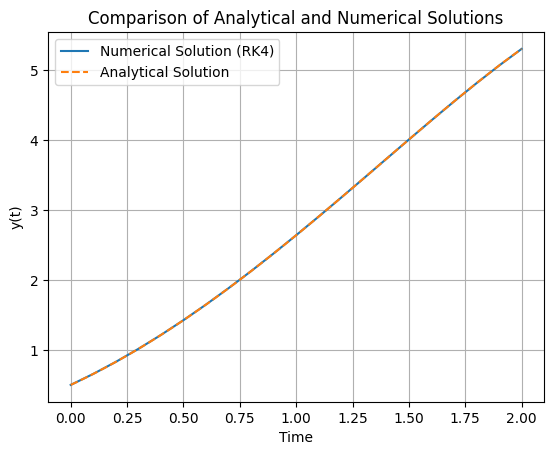

In [6]:
t0 = 0
y0 = 0.5
t_end = 2
h = 0.1

# Solve the differential equation using the RK4 method
t_values_rk4, y_values_rk4 = rk4(fx, y0, t0, t_end, h)

# Plot the solutions
plt.plot(t_values_rk4, y_values_rk4, label='Numerical Solution (RK4)')
plt.plot(t_exact, y_exact, label='Analytical Solution', linestyle='--')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Comparison of Analytical and Numerical Solutions')
plt.legend()
plt.grid(True)
plt.show()

## 16.3 - Runge-Kutta-Fehlberg Method

The Runge-Kutta-Fehlberg (RK45) method is a powerful technique for solving differential equations numerically with an adaptive step size control mechanism. This method employs a 4th order Runge-Kutta method for the actual solution step, combined with a 5th order method for error estimation, which allows it to control the step size based on the local error estimate.

Intermediate slopes:

$$
\begin{align*}
    k_1 &= f(t, y) \\
    k_2 &= f\left(t + \frac{h}{4}, y + \frac{hk_1}{4}\right) \\
    k_3 &= f\left(t + \frac{3h}{8}, y + \frac{3hk_1}{32} + \frac{9hk_2}{32}\right) \\
    k_4 &= f\left(t + \frac{12h}{13}, y + \frac{1932hk_1}{2197} - \frac{7200hk_2}{2197} + \frac{7296hk_3}{2197}\right) \\
    k_5 &= f\left(t + h, y + \frac{439hk_1}{216} - 8hk_2 + \frac{3680hk_3}{513} - \frac{845hk_4}{4104}\right) \\
    k_6 &= f\left(t + \frac{h}{2}, y - \frac{8hk_1}{27} + 2hk_2 - \frac{3544hk_3}{2565} + \frac{1859hk_4}{4104} - \frac{11hk_5}{40}\right)
\end{align*}
$$

Estimation and error correction:

$$
\begin{align*}
    y(t + h) &= y + \frac{25hk_1}{216} + \frac{1408hk_3}{2565} + \frac{2197hk_4}{4104} - \frac{hk_5}{5} \\
    \widetilde{y}(t + h) &= y + \frac{16hk_1}{135} + \frac{6656hk_3}{12825} + \frac{28561hk_4}{56430} - \frac{9hk_5}{50} + \frac{2hk_6}{55} \\
    R &= \frac{1}{h} |\widetilde{y}(t + h) - y(t + h)| \\
    \delta &= 0.84 \left( \frac{\epsilon}{R} \right)^{\frac{1}{4}}
\end{align*}
$$

Step adjustment:

- If $R \leq \epsilon$: accept $y(t + h)$ and continue to the next step with $h \leftarrow \delta h$.
- If $R > \epsilon$: reject the step and recalculate with $h \leftarrow \delta h$.

In [7]:
def rk45(f, y0, t0, t_end, h_init, epsilon):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    h = h_init

    while t < t_end:
        k1 = f(t, y)
        k2 = f(t + h/4, y + (k1 * h)/4)
        k3 = f(t + 3 * h / 8, y + (3 * k1 * h) / 32 + (9 * k2 * h) / 32)
        k4 = f(
            t + 12 * h / 13,
            y
            + (1932 * k1 * h) / 2197
            - (7200 * k2 * h) / 2197
            + (7296 * k3 * h) / 2197
        )
        k5 = f(
            t + h,
            y
            + (439 * k1 * h) / 216
            - 8 * (k2 * h)
            + (3680 * k3 * h) / 513
            - (845 * k4 * h) / 4104
        )
        k6 = f(
            t + h / 2,
            y
            - (8 * k1 * h) / 27
            + 2 * (k2 * h)
            - (3544 * k3 * h) / 2565
            + (1859 * k4 * h) / 4104
            - (11 * k5 * h) / 40
        )

        # Estimation and error correction
        y_next = (
            y
            + (25 * k1 * h) / 216
            + (1408 * k3 * h) / 2565
            + (2197 * k4 * h) / 4104
            - (k5 * h) / 5
        )
        y_tilde_next = (
            y
            + (16 * k1 * h) / 135
            + (6656 * k3 * h) / 12825
            + (28561 * k4 * h) / 56430
            - (9 * k5 * h) / 50
            + (2 * k6 * h) / 55
        )

        R = 1 / h * np.abs(y_tilde_next - y_next)
        delta = 0.84 * (epsilon / R) ** (1 / 4)

        # Step adjustment
        if R <= epsilon:
            y = y_next
            t += h
            if t <= t_end:
                t_values.append(t)
                y_values.append(y)
                
        h *= delta

    return np.array(t_values), np.array(y_values)

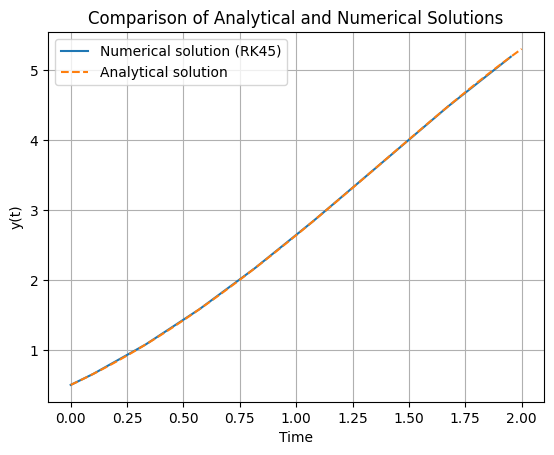

In [8]:
t0 = 0
y0 = 0.5
t_end = 2
h = 0.1

# Solve the differential equation using RK45 method
t_values_rk45, y_values_rk45 = rk45(fx, y0, t0, t_end, h, epsilon=0.00001)

# Plot the solutions
plt.plot(t_values_rk45, y_values_rk45, label="Numerical solution (RK45)")
plt.plot(t_exact, y_exact, label="Analytical solution", linestyle="--")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.title("Comparison of Analytical and Numerical Solutions")
plt.legend()
plt.grid(True)
plt.show()